In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data_1 = pd.read_csv('../input/multi2binary/data_5.csv')
data_1.head()
# data_1[['Score']].describe()

c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (12,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Score,senti_snownlp,strLen,word_len_words,word_max_words,word_std_words,word_sum_words,word_last_words,word_first_words,...,Vector_190,Vector_191,Vector_192,Vector_193,Vector_194,Vector_195,Vector_196,Vector_197,Vector_198,Vector_199
0,201e8bf2-77a2-3a98-9fcf-4ce03914e712,1,0.521543,37,26,924,220.871472,1894,6,0,...,-0.004621,0.008280,0.007357,0.020055,-0.036469,0.021086,0.000144,0.017052,-0.021060,0.016037
1,f4d51947-eac4-3005-9d3c-2f32d6068a2d,0,0.996441,31,17,5597,1572.519595,15782,5597,537,...,-0.006543,0.063266,-0.056215,-0.013342,-0.056270,-0.006397,0.046615,-0.020320,0.033579,-0.074566
2,74aa7ae4-03a4-394c-bee0-5702d3a3082a,0,0.449366,35,21,2713,650.682241,6740,721,0,...,-0.023558,-0.000714,-0.003532,-0.029310,0.049186,0.051639,0.013291,-0.003649,-0.013384,-0.024756
3,099661c2-4360-3c49-a2fe-8c783764f7db,1,0.985191,61,34,7907,1556.568096,18815,0,0,...,0.004925,-0.004709,-0.020584,-0.025733,-0.033174,0.031373,0.045305,-0.013305,-0.045273,-0.041843
4,97ca672d-e558-3542-ba7b-ee719bba1bab,1,0.972308,6,2,1315,485.000000,1660,1315,345,...,-0.002087,-0.010344,-0.076016,0.061931,0.032438,0.066842,-0.062037,0.014033,-0.047095,-0.026730


In [53]:
def threshold(result):
    boolean = (result['Score'] >= 4.0) & (result['Score'] < 4.732)
    result['Score'].ix[boolean] = 4
    result['Score'].ix[(result['Score'] >= 4.732)] = 5.0
    return result

result = pd.read_csv('../models/__models__/lgbm_test_101.csv')
result.columns = ['Id', 'Score']

result = threshold(result)
result.head()

result.to_csv('../result/lgbm_single_0.7185405005353127.csv', index = False, header = False)

c:\users\administrator\appdata\local\programs\python\python35\lib\site-packages\pandas\core\indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
def get_feature_importance(filename):
    feature_df = pd.read_csv('../models/info/' + filename)
    feature_names = feature_df.columns
    sort_feature = [val for val in feature_names if val != 'feature_name']
    feature_df = feature_df.sort_values(by = sort_feature, ascending = False)
    return feature_df

df = get_feature_importance('sub_feature_df.csv')
df['feature_name'].values.tolist()

['neg_word_ratio_words',
 'neg_word_ratio_words_jieba',
 'sentiment_self',
 'Vector_37',
 'Vector_38',
 'Vector_24',
 'ad_ratio',
 'Vector_182',
 'Vector_13',
 'Vector_110',
 'senti_snownlp',
 'Vector_161',
 'Vector_56',
 'Vector_171',
 'Vector_168',
 'Vector_59',
 'Vector_17',
 'Vector_69',
 'Vector_165',
 'Vector_108',
 'Vector_46',
 'Vector_114',
 'word_sum_wordsdict_1',
 'Vector_192',
 'Vector_143',
 'word_std_wordsdict_2',
 'Vector_135',
 'Vector_98',
 'word_last_wordsscore_5',
 'd_ratio',
 'word_sum_wordsdict_2',
 'Vector_12',
 'word_sum_wordsscore_3',
 'Vector_129',
 'Vector_86',
 'Vector_58',
 'Vector_63',
 'Vector_7',
 'Vector_145',
 'Vector_190',
 'Vector_118',
 'Vector_156',
 'Vector_22',
 'Vector_187',
 'Vector_90',
 'Vector_123',
 'word_std_words_jieba',
 'word_std_wordsscore_3',
 'word_first_words',
 'Vector_45',
 'Vector_68',
 'Vector_47',
 'Vector_134',
 'Vector_124',
 'Vector_101',
 'Vector_83',
 'Vector_41',
 'Vector_2',
 'Vector_55',
 'Vector_67',
 'Vector_31',
 'wor

-0.00024559589601835796


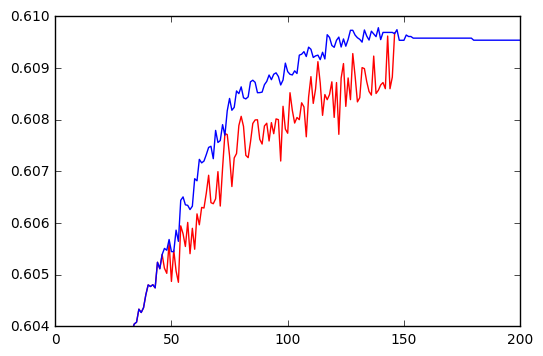

In [49]:
rmse = pd.read_csv('../models/info/sub_feature_df.csv')
shift = rmse['rmse'] - rmse['rmse'].shift(1)
shift = shift[shift<0]
print(np.median(shift.values))

other = pd.read_csv('../models/info/sub_feature_02182137.csv')
other = other['rmse'].values

rmse = rmse['rmse'].values
x = list(range(len(rmse)))
plt.ylim(0.604, 0.610)
plt.plot(x, rmse, 'r')
plt.plot(range(len(other)), other, 'b')
plt.show()

5    48760
4    25377
3     8450
2      872
1      533
Name: Score, dtype: int64


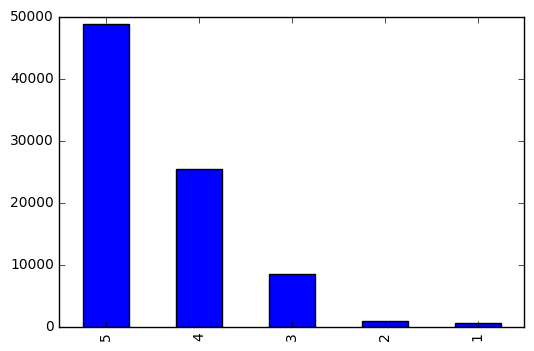

[0.5805314791884941, 0.3021359177064482, 0.10060481950661967, 0.010381941137251167, 0.00634584246118678]


In [6]:
train = pd.read_csv('../input/train_first.csv')

train.drop_duplicates(subset = 'Discuss', keep = 'first', inplace = True)
print(train.Score.value_counts())
train.Score.value_counts().plot(kind = 'bar')
plt.show()

score = train.Score.value_counts().values.tolist()
print([i / np.sum(score) for i in score])

In [3]:
# 丰富标签2
train_2 = train[train['Score'] == 2].reset_index()

train_2.head()
random_choice = np.random.choice(train_2.shape[0], 200, replace = False)

train_2_sub1 = train_2.loc[random_choice[:100]]
train_2_sub2 = train_2.loc[random_choice[100:]]
print(train_2_sub1.head())

sub_id = 1
ID = []
Discuss = []
Score = []
for i in range(100):
    for j in range(100, 200):
        ID.append('Score_2_' + str(sub_id))
        Score.append(2)
        new_discuss = train_2_sub1.loc[random_choice[i], 'Discuss'] + train_2_sub2.loc[random_choice[j], 'Discuss']  
        Discuss.append(new_discuss)
        sub_id += 1
        
train_score2 = pd.DataFrame({
    'Id' : ID,
    'Discuss' : Discuss,
    'Score' : Score
})

train_score2.head()

     index                                    Id  \
713  82031  c5fd4a57-550f-3d8a-9738-15b323108725   
682  77982  325c9432-f392-373f-addc-cb0488db6511   
845  97561  777b17eb-ec22-3076-ac21-6bf994883cbd   
588  65122  e88c6edf-8afc-33de-a38a-c2d3ebb4e396   
461  49601  55e6cff8-7863-37e9-b9cc-f0a7b789cfb9   

                                               Discuss  Score  
713                                   山上晚上有没有人自带帐篷去睡的呢      2  
682                                          实际没有宣传图片好      2  
845                                     失望????????????      2  
588              去长城的时候路过这里，没有太多的印象，据说这里有凯宾斯基最漂亮的一家酒店。      2  
461  对于身体欠佳的人来说，景山的高度还是蛮有挑战性的，不过爬到山顶，即可一览故宫的全貌，甚至可以...      2  


,Discuss,Id,Score
0,山上晚上有没有人自带帐篷去睡的呢服务态度不好，索道有点贵，再便宜点好了,Score_2_1,2
1,山上晚上有没有人自带帐篷去睡的呢本来就是太湖边上一个大公园而已，因为出名，收太贵的门票，不值...,Score_2_2,2
2,山上晚上有没有人自带帐篷去睡的呢太差了，去了绝对后悔，门票贵，还没什么可看的,Score_2_3,2
3,山上晚上有没有人自带帐篷去睡的呢太黑暗了.门票太贵.太贵.性价比超级低,Score_2_4,2
4,山上晚上有没有人自带帐篷去睡的呢没有进去，知道里面就是个土包，所以没有进去，售票处也没人买票...,Score_2_5,2


In [4]:
# 丰富标签1
train_1 = train[train['Score'] == 1].reset_index()

train_1.head()
random_choice = np.random.choice(train_1.shape[0], 200, replace = False)

train_1_sub1 = train_1.loc[random_choice[:100]]
train_1_sub2 = train_1.loc[random_choice[100:]]
print(train_1_sub1.head())

sub_id = 1
ID = []
Discuss = []
Score = []
for i in range(100):
    for j in range(100, 200):
        ID.append('Score_1_' + str(sub_id))
        Score.append(1)
        new_discuss = train_1_sub1.loc[random_choice[i], 'Discuss'] + train_1_sub2.loc[random_choice[j], 'Discuss']  
        Discuss.append(new_discuss)
        sub_id += 1
        
train_score1 = pd.DataFrame({
    'Id' : ID,
    'Discuss' : Discuss,
    'Score' : Score
})

train_score1.head()

     index                                    Id  \
470  90431  a4df5cec-8e81-3077-b624-b17543300393   
523  98306  4f9c3874-cda5-312e-b26e-57ed7efc72ea   
67   11813  353d7556-f78a-3f58-bcf9-c884c15c52d2   
452  87443  7d27d5b5-c513-3945-8c9f-5c155a7ca08c   
472  90507  974f9595-8f1d-31ab-894c-6e418105a8b4   

                                               Discuss  Score  
470  不讨巧，碰到下大雨，山上下雨确实很不好玩，太危险了。山上景点之间真有得走，没走到西海大峡谷的...      1  
523                         冬天是她们最美的地方，但是要想看见雾凇也是需要运气的      1  
67   差劲，景区特别小，半小时走完，到处是收费，湖边全被人工设施占据，连照相的地方都没有，油菜花海...      1  
452  去了以后感觉很失望，一点也没有古镇的感觉，河道两边都是租出去的小商贩，里面卖的都是几元店的东...      1  
472                   坑爹的古城维护费，也不知道为什么要把木府和紫禁城比，没有可比性啊      1  


,Discuss,Id,Score
0,不讨巧，碰到下大雨，山上下雨确实很不好玩，太危险了。山上景点之间真有得走，没走到西海大峡谷的...,Score_1_1,1
1,不讨巧，碰到下大雨，山上下雨确实很不好玩，太危险了。山上景点之间真有得走，没走到西海大峡谷的...,Score_1_2,1
2,不讨巧，碰到下大雨，山上下雨确实很不好玩，太危险了。山上景点之间真有得走，没走到西海大峡谷的...,Score_1_3,1
3,不讨巧，碰到下大雨，山上下雨确实很不好玩，太危险了。山上景点之间真有得走，没走到西海大峡谷的...,Score_1_4,1
4,不讨巧，碰到下大雨，山上下雨确实很不好玩，太危险了。山上景点之间真有得走，没走到西海大峡谷的...,Score_1_5,1


In [5]:
# train_score12 = pd.concat([train_score2, train_score1])
# train_score12.to_csv('../input/subset12/train_score12.csv', columns = ['Id', 'Discuss', 'Score'], index = False, encoding = 'utf-8')

In [35]:
predict = pd.read_csv('../input/predict_first.csv')
predict_label = pd.read_csv('../result/lgb_0.5971286287052687_02141613.csv')
predict_label.columns = ['Id', 'Score']
predict_label.head()

predict = pd.merge(predict, predict_label, on = 'Id', how = 'left')
predict_discuss = predict['Discuss'].values
label = predict['Score'].values

cnt = 0
for i, discuss in enumerate(predict_discuss):
    if '体检' in discuss:
        cnt += 1
        print(label[i])
        
print(cnt)

4.672876302633246
4.498723581449361
4.654087637769633
4.664621008840737
4.683025299441327
5


In [36]:
predict = pd.read_csv('../input/train_first.csv')

def allOneLabel(train, word):
    predict_discuss = predict['Discuss'].values
    label = predict['Score'].values
    cnt = 0
    label_ = -1
    for i, discuss in enumerate(predict_discuss):
        if word in discuss:
            if label_ == -1: label_ = label[i]
            elif label_ != label[i]: return False
            cnt += 1
    print(cnt, label_, word)
    return True

In [11]:
from sklearn.utils import shuffle

train = pd.read_csv('../input/train_first.csv')
train_3 = train[train['Score'] == 3]

train_3 = shuffle(train_3, random_state = 0)
train_3.head()

,Id,Discuss,Score
63574,00db70da-872a-36b5-8384-66852f7dc297,这个地方就是传说中人力扇风的场所，悬挂一把大扇子，仆人往下拉绳索，扇子摇动。,3
73279,0baee8e9-bb74-339c-b586-a33e160f7942,都是人，5岁以下小孩基本玩不了什么，非常失望,3
4245,dc26b915-5bd9-3f90-b4c3-6be26a10c2d6,大竹海之旅,3
53986,66eb9978-6e6f-3dad-8a9a-f68ca2dc7971,去了，不想看动物表演，总觉得可怜,3
39352,59a54e91-7ca6-348a-a832-5429c979c744,长春电影制片厂大门，虽然门外有个售票处，但显然因为严寒而关着门，其实就连大门内的售票大厅的窗...,3


In [12]:
train_3 = train_3[0:3]
train_3.head()

,Id,Discuss,Score
63574,00db70da-872a-36b5-8384-66852f7dc297,这个地方就是传说中人力扇风的场所，悬挂一把大扇子，仆人往下拉绳索，扇子摇动。,3
73279,0baee8e9-bb74-339c-b586-a33e160f7942,都是人，5岁以下小孩基本玩不了什么，非常失望,3
4245,dc26b915-5bd9-3f90-b4c3-6be26a10c2d6,大竹海之旅,3


In [18]:
def bacth(train, batch_size = 4):
    train_score3 = train[train['Score'] == 3]
    train_score4 = train[train['Score'] == 4]
    train_score5 = train[train['Score'] == 5]
    train_other = train[(train['Score'] == 1) | (train['Score'] == 2)]

    # shuffle
    train_score3 = shuffle(train_score3, random_state=0)
    train_score4 = shuffle(train_score4, random_state=0)
    train_score5 = shuffle(train_score5, random_state=0)

    for i in range(batch_size):
        train_3 = generate(train_score3, i, batch_size)
        train_4 = generate(train_score4, i, batch_size)
        train_5 = generate(train_score5, i, batch_size)
        train_all = pd.concat([train_3, train_4, train_5, train_other])
        yield train_all
        
def generate(train, i, batch_size):
    size = train.shape[0] // batch_size
    return train[i * size : (i + 1) * size]

In [20]:
train = pd.read_csv('../input/train_first.csv')
for _, train_all in enumerate(bacth(train, 4)):
    print(_, train_all.head())

0                                          Id  \
63574  00db70da-872a-36b5-8384-66852f7dc297   
73279  0baee8e9-bb74-339c-b586-a33e160f7942   
4245   dc26b915-5bd9-3f90-b4c3-6be26a10c2d6   
53986  66eb9978-6e6f-3dad-8a9a-f68ca2dc7971   
39352  59a54e91-7ca6-348a-a832-5429c979c744   

                                                 Discuss  Score  
63574             这个地方就是传说中人力扇风的场所，悬挂一把大扇子，仆人往下拉绳索，扇子摇动。      3  
73279                             都是人，5岁以下小孩基本玩不了什么，非常失望      3  
4245                                               大竹海之旅      3  
53986                                   去了，不想看动物表演，总觉得可怜      3  
39352  长春电影制片厂大门，虽然门外有个售票处，但显然因为严寒而关着门，其实就连大门内的售票大厅的窗...      3  
1                                          Id  \
93390  5d2090ad-e858-391d-8cf6-104d7df2323b   
33791  01fb66f2-4d17-3d1b-9878-ef2b7c04383e   
53931  c88492a2-3f9f-31c7-a990-886fd83bb057   
15625  aef9f63d-0521-3ca4-8025-1533e5fafb4b   
56810  e5212938-0173-387f-8d61-c652b2c5f421   

                                  

In [24]:
a = np.zeros((10, 1))
a.reshape(-1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
pred1 = pd.read_csv('../result/lgb_0.6118091662988503_02122131.csv')
pred1.columns = ['Id', 'pre1']
pred2 = pd.read_csv('../result/lgb_0.5638598336255841_02141050.csv')
pred2.columns = ['Id', 'pre2']

pred1 = pd.merge(pred1, pred2, on = 'Id', how = 'left')
pred1.describe()

,pre1,pre2
count,30000.000000,29999.000000
mean,4.431307,4.351425
std,0.351052,0.412428
min,0.608716,0.768400
25%,4.205974,4.128313
50%,4.527592,4.490509
75%,4.686618,4.643533
max,5.123354,4.931749


In [40]:
# find some word that if one exist the score is sure
def get_words(data_df, feature = 'words'):
    data_df = data_df[feature].values
    dictionary = []
    for sent in data_df:
        sent = sent[1:-1]
        sent = sent.split(';')
        for word in sent:
            if word != '':
                dictionary.append(word)
    return dictionary

# hankcs 分词数据库
data_word = pd.read_csv('../input/train_word.csv')
wordSet = list(set(get_words(data_word, 'words')))
print(len(wordSet), wordSet[0:100])

82279 ['高房价', '花就谢', '折返', '堵是', '多雾', '安县', '炸油条', '广播体操', '下第二场', '上涨', '五谷杂粮', '肥大', '无定', '浴室', '冒牌', '烟光山', '潮湿', '撰书', '蚯蚓', '没人接', '步赢斋鞋店', '阔然', '麻将', '花点', '看样', '通行', '浏览', '最远点', '小狐狸', '女真', '筋', '区区', '株式会社', '类', '雾色', '皮包', '手表', '紫藤萝', '不怎么样', '管一下吧', '不可分的', '龙桥', '五花海', '爱党', '套起来', '山雾', '的萧山机场', '伞柄', '老林', '喜堂', '预知', '正中心', '有一帆', '粗制滥造', '干完', '冲击', '民安', '三面石峰', '历史性', '荟集', '手下', '元起', '摇手', '臭汗', '蓝景那', '刮风下雨', '绫', '大罗', '何不', '错车', '已于', '昌平区小汤山农业科技示范园东区内', '塔内', '玩一个人', '降妖', '潇湘', '酪', '娱乐场所', '地级市', '游弋', '涉', '标识牌', '包天', '龙身', '拳拳', '真身', '不自量力', '哈里路亚山', '山南门', '油菜', '临沧', '北口', '澄清', 'SB', '体检丽水医院', '京市', '薄命', '秋迹', '涌金门', '缓缓的']


In [39]:
train = pd.read_csv('../input/train_first.csv')
for word in wordSet:
    allOneLabel(train, word)

1 4 高房价
1 3 花就谢
1 5 堵是
1 4 炸油条
1 5 广播体操
1 5 下第二场
1 4 肥大
1 4 烟光山
1 4 撰书
1 3 蚯蚓
1 3 步赢斋鞋店
1 4 阔然
1 4 最远点
1 5 株式会社
1 4 雾色
1 5 管一下吧
3 5 爱党
1 5 套起来
1 4 的萧山机场
1 5 伞柄
2 5 预知
1 5 有一帆
1 4 干完
1 5 三面石峰
2 4 荟集
2 4 摇手
1 2 臭汗
1 3 蓝景那
1 4 昌平区小汤山农业科技示范园东区内
1 4 玩一个人
1 4 降妖
2 5 地级市
4 4 标识牌
1 5 包天
1 4 拳拳
1 4 不自量力
1 5 临沧
1 5 体检丽水医院
1 4 薄命
1 5 秋迹
1 5 表现形式
1 5 村子了
1 4 头绪
1 4 红白事
1 4 ３路
1 5 旧区
2 5 名园古刹
1 5 大后林
1 4 讲课
1 5 棉织社
1 4 地震纪念馆
1 5 翻版
1 3 就绿化好点
1 3 民族园路
1 5 笫
1 4 南浦大桥
1 5 成都双流国际机场
4 5 丛山
2 5 一伙人
1 5 三春晖
1 4 黄葛
1 3 乘马
1 5 69路
6 5 起起伏伏
1 4 泥砖
1 5 美而人
3 5 宫室
2 3 root
1 4 受灾
1 3 望湖楼
1 5 肌肤
1 5 莫惜
1 4 居鹿田
1 4 现职
1 4 外远远
1 5 九间大殿
1 5 >POCO<br
1 4 鼓足勇气
1 4 虽为
3 5 张口
1 5 像男人
1 5 科博会
1 4 精疲力竭
1 5 吼叫声
1 5 bling
1 5 一家独大
1 5 溺水者
1 5 游一生
2 4 依衬
1 5 海浪般
1 3 清净寺
1 5 莫哭
6 5 盘古
1 5 迈入
5 4 说到底
2 5 喜欢自己一个人
1 4 修护
2 4 喂鸟
1 3 掘起
1 5 没心没肺
1 3 咏唱
1 5 湿润气候
1 4 杀马特
1 5 贵字
1 5 henhaohenhaohen
1 3 983路
1 5 穿越一个停车场
1 4 脚不沾地
2 5 磨炼
1 2 纯粹站
1 4 3511826
2 4 永兴
2 5 寻梦
1 5 蛇行
1 5 放浪
1 3 地望
3 5 明柱
1 5 湛碧
1 4 温泉馆
1 5 珊瑚沙水库
1 5 蜀地
1 5 

KeyboardInterrupt: 